In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
stats = pd.read_csv('./data/stats52_sample10.csv')
stars = pd.read_csv('./data/starrings_group_sample10.csv')

In [5]:
stats.head()

,owner,repo,additions,commits,deletions,weekofyear
0,IanLunn,Hover,0,0,0,1
1,JakeWharton,ViewPagerIndicator,0,0,0,1
2,carrierwaveuploader,carrierwave,0,0,0,1
3,eczarny,spectacle,1937,12,1469,1
4,inconshreveable,ngrok,0,0,0,1


In [6]:
stars.head()

,owner,repo,weekofyear,stars
0,IanLunn,Hover,1,15
1,IanLunn,Hover,2,84
2,IanLunn,Hover,3,67
3,IanLunn,Hover,4,74
4,IanLunn,Hover,5,82


In [12]:
stats_stars = stats.merge(stars, on=['owner', 'repo', 'weekofyear'], how='inner')

In [14]:
stats_stars.describe()

,additions,commits,deletions,weekofyear,stars
count,519.000000,519.000000,519.000000,519.000000,519.000000
mean,330.433526,1.096339,130.924855,26.549133,27.040462
std,5113.083715,3.629880,1249.323924,14.995398,23.752023
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,14.000000,9.000000
50%,0.000000,0.000000,0.000000,27.000000,17.000000
75%,0.000000,0.000000,0.000000,39.500000,41.000000
max,113958.000000,34.000000,22577.000000,52.000000,181.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1082c7ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c7a1410>]], dtype=object)

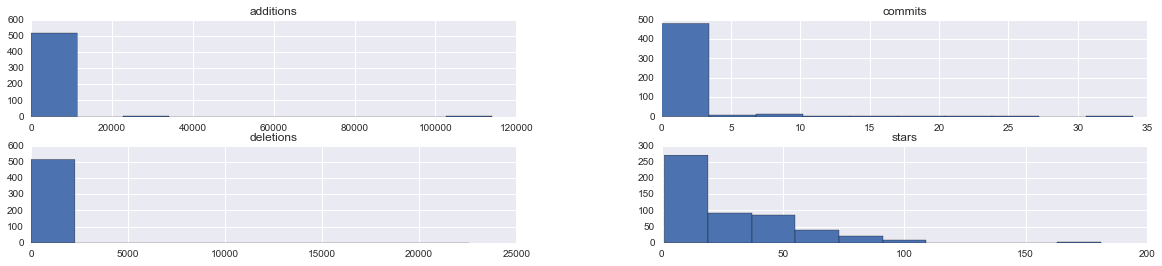

In [16]:
stats_stars[['additions', 'commits', 'deletions', 'stars']].hist(figsize=(20,4))

In [55]:
stars_avg = stats_stars.groupby('weekofyear')['stars'].mean()
additions_avg = stats_stars.groupby('weekofyear')['additions'].mean()
deletons_avg = stats_stars.groupby('weekofyear')['deletions'].mean()
commits_avg = stats_stars.groupby('weekofyear')['commits'].mean()
activity_avg = additions_avg + deletons_avg + commits_avg

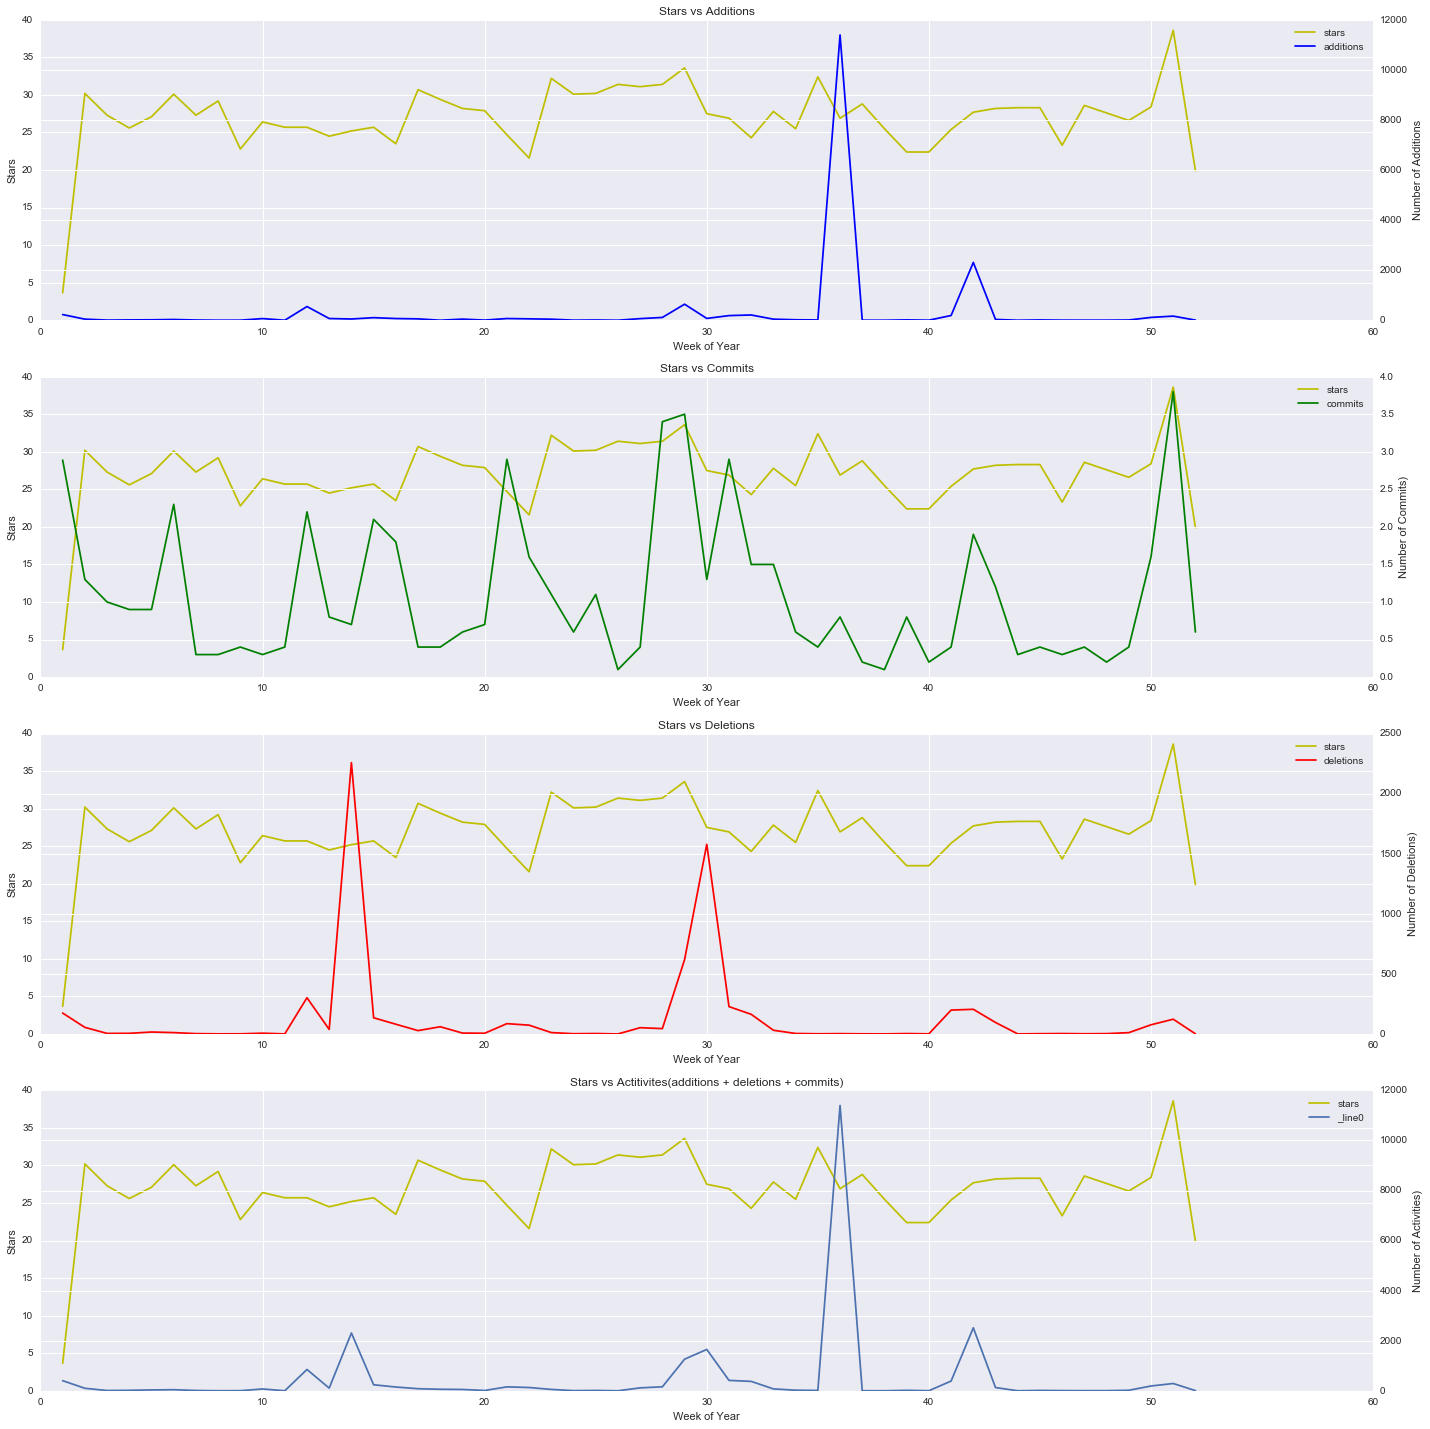

In [56]:
plt.figure(figsize=(20,20))
# stars vs addtitions
ax1 = plt.subplot(4,1,1)
ax2 = ax1.twinx()
line1 = ax1.plot(stars_avg, 'y-')
line2 = ax2.plot(additions_avg, 'b-')

ax1.set_xlabel('Week of Year')
ax1.set_ylabel('Stars')
ax1.legend(loc=1)
ax1.set_title('Stars vs Additions')

lines = line1 + line2
labs = [l.get_label() for l in lines]
ax1.legend(lines, labs, loc=0)
ax2.set_ylabel('Number of Additions')

# stars vs commits
ax3 = plt.subplot(4,1,2)
ax4 = ax3.twinx()
line3 = ax3.plot(stars_avg, 'y-')
line4 = ax4.plot(commits_avg, 'g-')

ax3.set_xlabel('Week of Year')
ax3.set_ylabel('Stars')
ax3.legend(loc=1)
ax3.set_title('Stars vs Commits')

lines = line3 + line4
labs = [l.get_label() for l in lines]
ax3.legend(lines, labs, loc=0)
ax4.set_ylabel('Number of Commits)')

# stars vs deletions
ax5 = plt.subplot(4,1,3)
ax6 = ax5.twinx()

line5 = ax5.plot(stars_avg, 'y-')
line6 = ax6.plot(deletons_avg, 'r-')

ax5.set_xlabel('Week of Year')
ax5.set_ylabel('Stars')
ax5.legend(loc=1)
ax5.set_title('Stars vs Deletions')

lines = line5 + line6
labs = [l.get_label() for l in lines]
ax5.legend(lines, labs, loc=0)
ax6.set_ylabel('Number of Deletions)')

# stars vs Activities
ax7 = plt.subplot(4,1,4)
ax8 = ax7.twinx()

line7 = ax7.plot(stars_avg, 'y-')
line8 = ax8.plot(activity_avg, '-')

ax7.set_xlabel('Week of Year')
ax7.set_ylabel('Stars')
ax7.legend(loc=1)
ax7.set_title('Stars vs Actitivites(additions + deletions + commits)')

lines = line7 + line8
labs = [l.get_label() for l in lines]
ax7.legend(lines, labs, loc=0)
ax8.set_ylabel('Number of Activities)')

plt.tight_layout()
plt.show()

### Conclustion:
- Commits appear to be more similar to starrings compared with other activities.
- Weekly commits follow the trends of starring in most weeks except between week 15 ~ 25